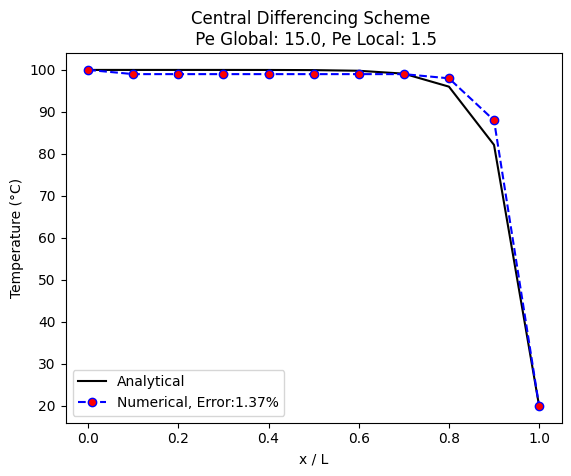

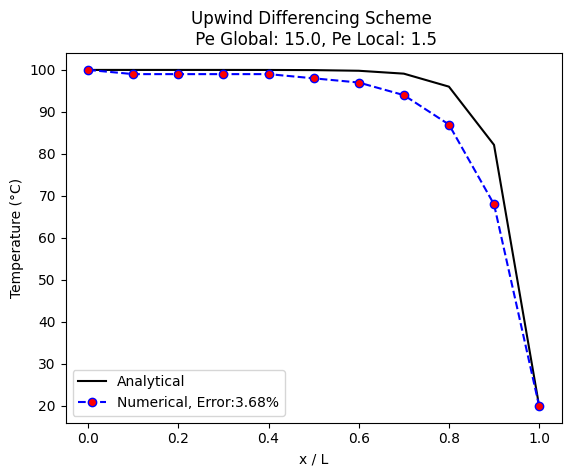

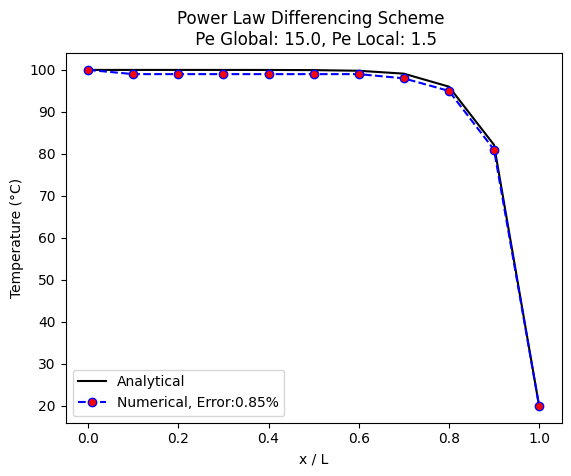

<generator object solve.<locals>.<genexpr> at 0x00000182C4C2CDC0>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm_and_tools import analytical, plotting, error_calc
from schemes import *

def solve(length, cell_count, gamma_T, density, vel, T_West, T_East):
    # Domain setup
    delta_x = length / (cell_count - 1)
    x = np.linspace(0, length, cell_count) 
    Temp = np.full(cell_count, T_East) # deg C

    # Equations Setup, do not round the values
    Pe_global = (density * vel * length / gamma_T)
    Pe_local = (density * vel * delta_x / gamma_T)
    T_analytical = analytical(x, length, Pe_global, T_West, T_East)

    # note the order for solving in for loop at the end
    schemes = ["Central Differencing Scheme",
                "Upwind Differencing Scheme",
                "Power Law Differencing Scheme",]
    results = [cds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East), 
                uds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East), 
                pds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East, Pe_local)]
    errors = [error_calc(cell_count, T_analytical, res) for res in results]

    figures = []
    for i, j, k in zip(schemes, results, errors):
        figure = plotting(x, T_analytical, i, j, k, Pe_global, Pe_local)
        figures.append(figure)
        
    return (i for i in figures)

solve(length = 1.0, cell_count = 10, # domain setup
      gamma_T = 0.15, density = 0.72, # fluid properties
      vel = 0.8, T_West=100.0, T_East=20.0) # boundary conditions